In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import numpy as np
import scipy.signal

import scipy.signal
from PIL import Image, ImageDraw
#%matplotlib notebook
%matplotlib inline
mpl.rcParams['figure.figsize'] = (18, 6)
cmap =[]

In [6]:
import os, glob, sys


c = np.loadtxt("csv/c18-06-24-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
#c = np.loadtxt("c18-07-01-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
print(c.shape)
print "done"

(74288L, 5L)
done


(74288L,)
[[3.35581731e-05 3.35581731e-05 3.35581731e-05]
 [3.35581731e-05 3.35581731e-05 3.35581731e-05]
 [3.35581731e-05 3.35581731e-05 3.35581731e-05]
 ...
 [3.35581731e-05 3.35581731e-05 3.35581731e-05]
 [3.35581731e-05 3.35581731e-05 3.35581731e-05]
 [3.35581731e-05 3.35581731e-05 3.35581731e-05]]


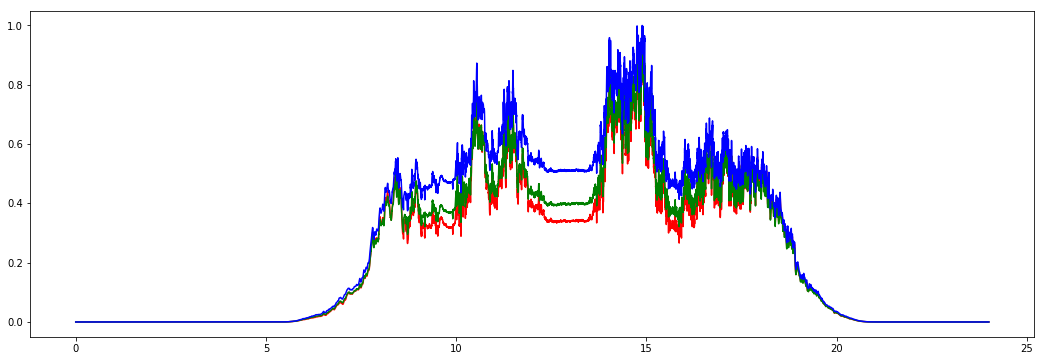

In [20]:
time = c[:,0]
time = (time - time[0])/3600

cmean = np.mean(c[:,1:4],axis=1)
print cmean.shape

#plt.plot(time,c[:,1] -cmean,'r')
#plt.plot(time,c[:,2] - cmean ,'g')
#plt.plot(time,c[:,3]- cmean,'b')

#plt.plot(time,cmean,'k')
#plt.savefig("graph.png")

normc = c[:,1:4]/np.max(c[:,1:4])
plt.plot(time,normc[:,0],'r')
plt.plot(time,normc[:,1],'g')
plt.plot(time,normc[:,2],'b')

print normc

(7429L, 3L)
(7429L,)
[[3.35581731e-05 3.35581731e-05 3.35581731e-05]
 [3.35581731e-05 3.35581731e-05 3.35581731e-05]
 [3.35581731e-05 3.35581731e-05 3.35581731e-05]
 ...
 [3.35581731e-05 3.35581731e-05 3.35581731e-05]
 [3.35581731e-05 3.35581731e-05 3.35581731e-05]
 [3.35581731e-05 3.35581731e-05 3.35581731e-05]]


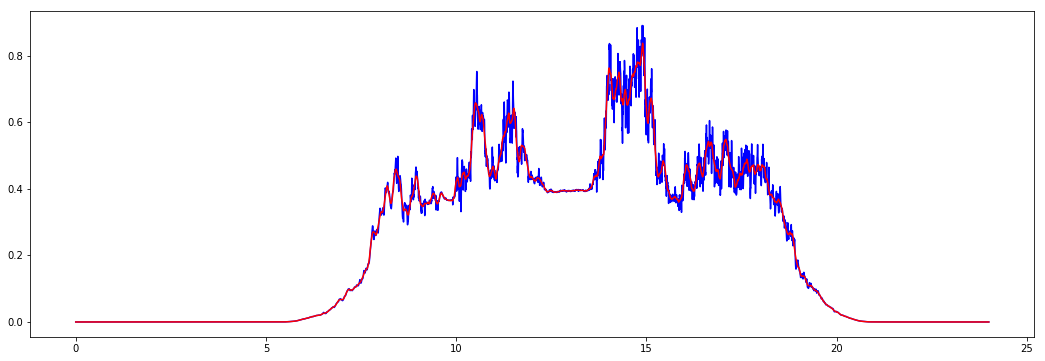

In [58]:
# decimate and lowpass to smooth signal
dnormc =  scipy.signal.decimate(normc, 10, n=None, ftype='iir', axis=0, zero_phase=True)
fnormc =  scipy.signal.savgol_filter(dnormc, window_length=59, polyorder=2,  axis=0, mode='interp', cval=0.0)

l = dnormc.shape
print(fnormc.shape)

time = np.linspace(0,24.,l[0])
print time.shape

plt.plot(time[:],dnormc[:,1],'b')
plt.plot(time[:],fnormc[:,1],'r')


#plt.plot(time,dnormc[:,1],'g')
#plt.plot(time,dnormc[:,2],'b')

print normc

In [60]:
# create include file
def rgb_to_hex(r, g, b):
    hc = int(b)
    hc = hc + (int(g) << 8)
    hc = hc + (int(r) << 16)
    return "0x{:02x}{:02x}{:02x}".format(int(r),int(g),int(b))



red = np.floor(270.*np.clip(fnormc[:,0],0., 1.))
grn = np.floor(270.*np.clip(fnormc[:,1],0., 1.))
blu = np.floor(270.*np.clip(fnormc[:,2],0., 1.))

print(np.max(red))
print(np.max(grn))
print(np.max(blu))

cinc = open("colors-59-10x.h",'w')

cinc.write("const PROGMEM prog_uint32_t ctable[]={")
# skip beginning zeros

skipbegin = False
hexcolors =[]
carray =[]
skipcount =0
for i, r in enumerate(red):

    if (red[i]+grn[i]+blu[i]) == 0 and skipbegin:
        skipcount += 1
    else:
        skipbegin = False
        if (red[i]+grn[i]+blu[i]) > 0 :
            hexcolors.append(rgb_to_hex(red[i],grn[i],blu[i]))
            carray.append([redf[i],grnf[i],bluf[i]])
    
for hc in hexcolors[:-1]:
    cinc.write("{:s},\n".format(hc) )
cinc.write("{:s}}};\n".format(hc) )

            
cinc.write("\n#define SKIP_BEGIN {:d}\n".format(skipcount) )
cinc.write("\n#define CTAB_LEN {:d}\n".format(i) )
cinc.write("#define SECS_PER_C {:f}\n".format((24*3600.)/i) )
cinc.close()

print("{} zero colors skipped".format(skipcount))

224.0
226.0
250.0
0 zero colors skipped


In [8]:
with open('skycolors.csv', 'w+') as f:
    for i, r in enumerate(red):
        f.write("{:f},{:f},{:f}\n".format(red[i],grn[i],blu[i]))

    